In [31]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html
# https://scikit-learn.org/stable/modules/outlier_detection.html#outlier-detection

In [5]:
import pandas as pd
import numpy as np
from pathlib import Path
from pprint import pprint
from scipy import signal

In [1]:
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large'}
pylab.rcParams.update(params)

## Preprocessing

In [67]:
basePath = '../../zju-gaitacc/'
LENGTH = 1000

In [72]:
def session_to_dataframe(session):
    df = pd.DataFrame(columns=range(3 * LENGTH + 1))
    
    i = 0
    for subj in Path(basePath + session).glob('subj_*'):
        for rec in subj.glob('*'):
            with open(rec.joinpath('3.txt')) as f:
                # extract the relevant range
                with open(rec.joinpath('useful.txt')) as use:
                    begin_rec, end_rec = use.readline().split(',')

                begin_rec = int(begin_rec)
                end_rec = int(end_rec)

                # read the content of the file
                lines = list(map(lambda line: [float(x) for x in line.strip().split(',')], f.readlines()))

                # select only relevant portion of the recording and resample it to fixed length
                lines = list(map(lambda x: signal.resample(x[begin_rec:end_rec], LENGTH), lines))

                # select label of measurement
                label = int(subj.name.split('_')[1])

                flat_list = [el for l in lines for el in l]
                flat_list.append(label)
                df.loc[i] = flat_list
                i += 1
                
    return df

In [66]:
df.to_csv('full_rec.csv', sep='\t', encoding='utf-8')

In [76]:
df_s0 = session_to_dataframe('session_0')
df_s0.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,3000
0,-0.463888,-0.568022,-0.556638,-0.561470,-0.559863,-0.527601,-0.464758,-0.396249,-0.387402,-0.328449,...,-0.138952,-0.137765,-0.165438,-0.156658,-0.164774,-0.208861,-0.249122,-0.228193,-0.284959,1.0
1,-0.231352,-0.240185,-0.233624,-0.124191,-0.005490,0.003107,0.049905,0.000627,-0.074656,-0.182033,...,0.026411,-0.207980,-0.281305,-0.285548,-0.269580,-0.298430,-0.226888,-0.163800,-0.066601,1.0
2,-0.163377,-0.161731,-0.145932,-0.092971,-0.045315,-0.038921,-0.039928,-0.040995,-0.037494,-0.076497,...,-0.157633,-0.217119,-0.239774,-0.242222,-0.236572,-0.245496,-0.223905,-0.197014,-0.200350,1.0
3,-0.093648,-0.019226,-0.070624,-0.080682,-0.119799,-0.119887,-0.119711,-0.120810,-0.118555,-0.122372,...,-0.162284,-0.158943,-0.126964,-0.118077,-0.105352,-0.040786,-0.042058,-0.047069,-0.139111,1.0
4,-0.202545,-0.201062,-0.197752,-0.203694,-0.188688,-0.099192,-0.078455,-0.076922,-0.048118,-0.084154,...,-0.182290,-0.152743,-0.163139,-0.096887,-0.100774,-0.128212,-0.154171,-0.167566,-0.127566,1.0


In [77]:
df_s0.shape

(132, 3001)

In [84]:
df_s1 = session_to_dataframe('session_1')
df_s1.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,3000
0,-0.080000,-0.043293,0.069078,0.193214,0.174583,0.087142,0.081191,0.049842,0.040916,-0.006895,...,-0.077333,-0.012389,0.046707,0.037176,0.042090,0.036486,-0.005772,-0.041089,-0.040202,1.0
1,0.040890,0.039615,0.040546,0.081605,0.121403,0.162758,0.201138,0.199434,0.200334,0.200997,...,-0.043100,-0.035268,-0.115432,-0.122316,-0.081916,-0.078637,-0.081458,-0.078331,-0.081934,1.0
2,0.080000,0.083538,0.103522,0.163530,0.153366,0.161573,0.200171,0.319858,0.246203,0.317491,...,-0.334404,-0.441841,-0.381637,-0.349058,-0.207938,-0.218841,-0.064029,-0.283263,-0.219555,1.0
3,-0.069611,-0.090384,-0.068066,-0.051914,-0.023335,0.070937,0.095703,0.151044,0.174884,0.188573,...,-0.030943,-0.050155,0.005165,-0.008122,0.045458,-0.003261,-0.068483,-0.243170,-0.312281,1.0
4,0.186489,0.252498,0.227937,0.252023,0.231094,0.312947,0.302014,0.347908,0.268394,0.546048,...,0.037286,0.042754,0.037252,0.042627,0.037815,0.040463,0.068467,0.087108,0.074376,1.0


In [85]:
df_s1.shape

(918, 3001)

In [86]:
df_s1.to_csv('full_session1.csv', sep='\t', encoding='utf-8')

## Data loading

In [1]:
from sklearn.model_selection import train_test_split

In [32]:
df_s1 = pd.read_csv('full_session1.csv', sep='\t')

In [121]:
df_s1.shape

(918, 3002)

In [122]:
df_s1.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,3000
0,0,-0.080000,-0.043293,0.069078,0.193214,0.174583,0.087142,0.081191,0.049842,0.040916,...,-0.077333,-0.012389,0.046707,0.037176,0.042090,0.036486,-0.005772,-0.041089,-0.040202,1.0
1,1,0.040890,0.039615,0.040546,0.081605,0.121403,0.162758,0.201138,0.199434,0.200334,...,-0.043100,-0.035268,-0.115432,-0.122316,-0.081916,-0.078637,-0.081458,-0.078331,-0.081934,1.0
2,2,0.080000,0.083538,0.103522,0.163530,0.153366,0.161573,0.200171,0.319858,0.246203,...,-0.334404,-0.441841,-0.381637,-0.349058,-0.207938,-0.218841,-0.064029,-0.283263,-0.219555,1.0
3,3,-0.069611,-0.090384,-0.068066,-0.051914,-0.023335,0.070937,0.095703,0.151044,0.174884,...,-0.030943,-0.050155,0.005165,-0.008122,0.045458,-0.003261,-0.068483,-0.243170,-0.312281,1.0
4,4,0.186489,0.252498,0.227937,0.252023,0.231094,0.312947,0.302014,0.347908,0.268394,...,0.037286,0.042754,0.037252,0.042627,0.037815,0.040463,0.068467,0.087108,0.074376,1.0


In [33]:
select_classes = range(1, 21)
# df = pd.concat([df_s1_128, df_s2_128])
df_s1 = df_s1.loc[df_s1[df_s1.columns[-1]].isin(select_classes)]
y = df_s1[df_s1.columns[-1]].values
df_s1.drop([df_s1.columns[-1]], axis=1, inplace=True)
X = df_s1.values

In [34]:
X.shape, y.shape

((120, 3001), (120,))

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

In [131]:
X_train.shape, X_test.shape

((734, 3001), (184, 3001))

In [184]:
df_s0 = pd.read_csv('full_session0.csv', sep='\t')

In [185]:
y = df_s0[df_s0.columns[-1]].values
df_s0.drop([df_s0.columns[-1]], axis=1, inplace=True)
X = df_s0.values

In [186]:
s0_X_train, ss0_X_test, s0_y_train, s0_y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

In [27]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=0)
X_2d = tsne.fit_transform(X)

In [49]:
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import StrMethodFormatter
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 12),
          'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large'}
pylab.rcParams.update(params)

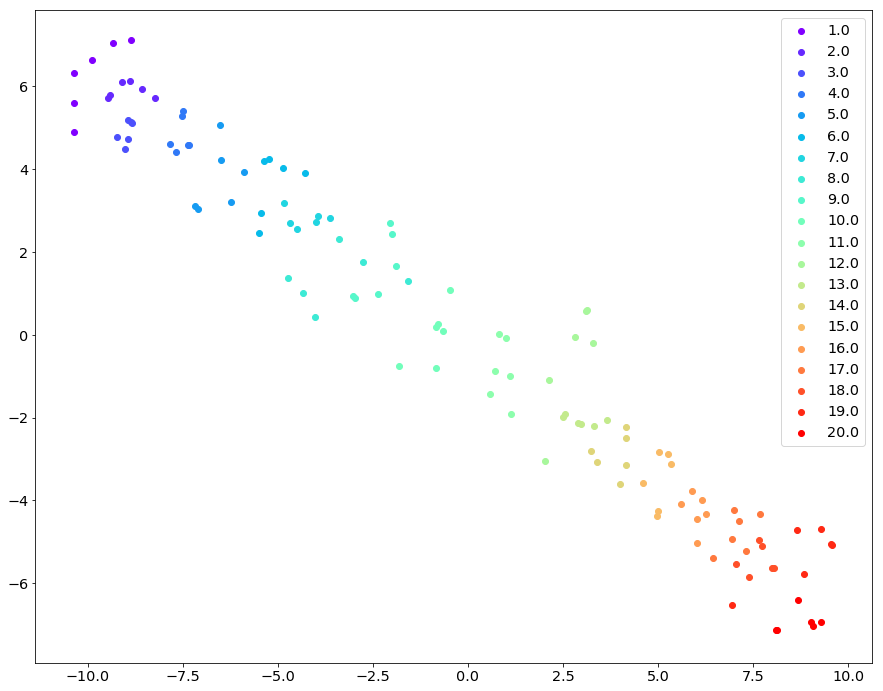

In [50]:
target_ids = np.unique(y)
colors = cm.rainbow(np.linspace(0, 1, len(target_ids)))
for i, c in zip(target_ids, colors):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], label=i, color=c)
plt.legend()
plt.show()

## One-class SVM

In [125]:
from sklearn import svm

In [190]:
clf = svm.OneClassSVM(nu=0.2, kernel="rbf", gamma='auto')
clf.fit(X_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.2, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [191]:
train_pred = clf.predict(X_train)

In [192]:
str(np.count_nonzero(train_pred == -1)) + '/' + str(len(X_train))

'152/734'

In [193]:
test_pred = clf.predict(X_test)

In [194]:
str(np.count_nonzero(test_pred == -1)) + '/' + str(len(X_test))

'67/184'

In [195]:
s0_pred = clf.predict(X)

In [196]:
str(np.count_nonzero(s0_pred == -1)) + '/' + str(len(X))

'38/132'

## USPS

In [197]:
import h5py

In [198]:
with h5py.File('../data/usps.h5', 'r') as hf:
    train = hf.get('train')
    X_train = train.get('data')[:]
    y_train = train.get('target')[:]
    test = hf.get('test')
    X_test = test.get('data')[:]
    y_test = test.get('target')[:]
    
X_train.shape, y_train.shape

((7291, 256), (7291,))

In [205]:
X = np.concatenate((X_train, X_test), axis=0)

In [206]:
y = np.concatenate((y_train, y_test), axis=0)

In [207]:
clf = svm.OneClassSVM(nu=0.2, kernel="rbf", gamma='auto')
clf.fit(X_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.2, random_state=None, shrinking=True, tol=0.001,
      verbose=False)